In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
dataset = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

In [180]:
dataset.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [181]:
dataset.review[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [182]:
print(len(dataset))

50000


In [183]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [184]:
dataset.shape

(50000, 2)

In [185]:
dataset.duplicated().any()

True

In [186]:
dataset = dataset.drop_duplicates()

In [187]:
dataset.shape

(49582, 2)

In [188]:
dataset.sentiment.value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

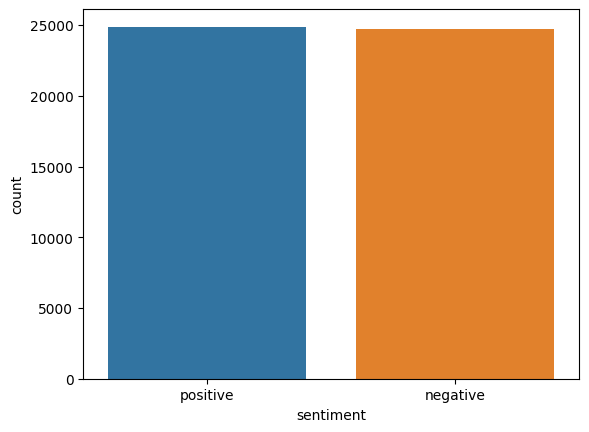

In [189]:
sns.barplot(x = dataset['sentiment'].value_counts().index, y = dataset['sentiment'].value_counts())
plt.show()

In [190]:
import nltk
import re
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from multiprocessing import Pool, cpu_count

# Precompile the regular expressions
html_remover = re.compile(r'<.*?>')
non_alpha_remover = re.compile(r'[^a-zA-Z\s]')

# Download stopwords silently
nltk.download('stopwords', quiet=True)

ps = PorterStemmer()
all_stop_words = set(stopwords.words('english'))
#stop_words.remove('not')

# Function to process each review
def clean_review(i):
    try:
        review = dataset.iloc[i]['review']
        review = html_remover.sub(' ', review)  # Remove HTML tags
        review = non_alpha_remover.sub(' ', review)  # Keep only letters and spaces
        review = review.lower().strip()

        # Tokenization and stemming
        review = ' '.join(ps.stem(word) for word in review.split() if word not in all_stop_words)

        return review
    except KeyError:
        print(f"Missing review data at index {i}.")
        return ''
    except Exception as e:
        print(f"An error occurred at index {i}: {e}")
        return ''



[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [ ]:
print(stopwords.words('english'))

In [191]:
corpus[0]

'one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker s

In [192]:
print(len(corpus))

27479


In [193]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# TEXT Vectorization

In [194]:
tokenizer = Tokenizer(num_words= 10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(corpus)

sequence = tokenizer.texts_to_sequences(corpus)

word_index = tokenizer.word_index
print("\nWord Index:")
print(word_index)


Word Index:
{'<OOV>': 1, 'movi': 2, 'film': 3, 'not': 4, 'one': 5, 'like': 6, 'time': 7, 'good': 8, 'make': 9, 'charact': 10, 'see': 11, 'get': 12, 'watch': 13, 'even': 14, 'stori': 15, 'would': 16, 'realli': 17, 'well': 18, 'scene': 19, 'look': 20, 'show': 21, 'much': 22, 'end': 23, 'bad': 24, 'peopl': 25, 'great': 26, 'go': 27, 'love': 28, 'also': 29, 'act': 30, 'think': 31, 'play': 32, 'first': 33, 'way': 34, 'thing': 35, 'made': 36, 'could': 37, 'know': 38, 'say': 39, 'seem': 40, 'work': 41, 'plot': 42, 'actor': 43, 'mani': 44, 'two': 45, 'seen': 46, 'come': 47, 'year': 48, 'take': 49, 'never': 50, 'want': 51, 'life': 52, 'best': 53, 'littl': 54, 'tri': 55, 'ever': 56, 'man': 57, 'give': 58, 'better': 59, 'still': 60, 'perform': 61, 'find': 62, 'feel': 63, 'use': 64, 'someth': 65, 'part': 66, 'director': 67, 'actual': 68, 'interest': 69, 'lot': 70, 'back': 71, 'real': 72, 'guy': 73, 'though': 74, 'funni': 75, 'old': 76, 'cast': 77, 'live': 78, 'music': 79, 'noth': 80, 'anoth': 81,

In [195]:
sequence[0]

[5,
 227,
 352,
 13,
 2752,
 198,
 1596,
 110,
 533,
 103,
 33,
 35,
 2857,
 2752,
 1064,
 1,
 19,
 476,
 89,
 110,
 289,
 27,
 1339,
 4,
 21,
 5006,
 328,
 8058,
 21,
 565,
 1695,
 1015,
 577,
 321,
 476,
 3083,
 236,
 64,
 289,
 161,
 2752,
 6515,
 306,
 9870,
 4750,
 1921,
 542,
 1,
 1166,
 1300,
 1,
 419,
 3310,
 2013,
 768,
 1788,
 1802,
 866,
 203,
 1,
 1,
 4,
 244,
 3505,
 2507,
 419,
 284,
 44,
 8729,
 3396,
 7588,
 5414,
 953,
 875,
 1969,
 1,
 234,
 2030,
 5299,
 400,
 7167,
 5866,
 50,
 157,
 166,
 16,
 39,
 210,
 778,
 21,
 590,
 108,
 204,
 21,
 1483,
 656,
 106,
 271,
 1043,
 2090,
 175,
 656,
 617,
 656,
 724,
 2752,
 736,
 113,
 33,
 198,
 56,
 134,
 2857,
 1295,
 1794,
 39,
 1388,
 13,
 353,
 925,
 2752,
 116,
 6704,
 244,
 453,
 1196,
 476,
 4,
 476,
 4870,
 2838,
 1696,
 2357,
 1,
 3980,
 100,
 464,
 12,
 166,
 18,
 947,
 573,
 564,
 3980,
 96,
 768,
 3864,
 590,
 286,
 592,
 1011,
 768,
 332,
 13,
 2752,
 121,
 142,
 1745,
 2711,
 221,
 1524,
 12,
 443,
 3397,
 369]

# plotting the number of words in each review to determine the right number of max_length

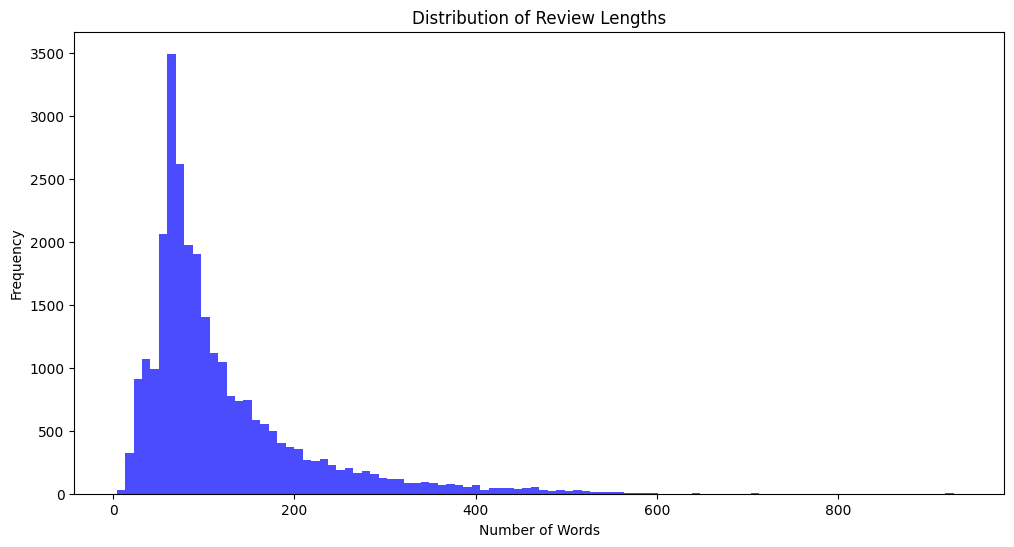

In [196]:
review_lengths = [len(seq) for seq in sequence]

plt.figure(figsize=(12, 6))
plt.hist(review_lengths, bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Padding and Truncating Sequences

In [197]:
max_length = 90
padding_type = 'post'
truncating_type = 'post'

padded_sequences = pad_sequences(
sequence,
maxlen = max_length,
padding = padding_type,
truncating = truncating_type) 

In [198]:
print("\nPadded Sequences:")
print(padded_sequences.shape)


Padded Sequences:
(27479, 90)


In [199]:
X = padded_sequences

In [204]:
from sklearn.preprocessing import LabelEncoder
y = dataset['sentiment'].values
# to match the number of x examples / after it decreased by the cleaning step to 27479
y = y[:len(X)] 
le = LabelEncoder()
y = le.fit_transform(y)

In [205]:
y.shape

(27479,)

In [206]:
print(X.shape)

(27479, 90)


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [208]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Embedding

In [209]:
vocab_size = 10000

model = Sequential([
    # first try -output_dim was = 100
    Embedding(input_dim = vocab_size, output_dim = 125, input_length = max_length),
    LSTM(128, return_sequences = True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [210]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [211]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [212]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [213]:
history = model.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test), callbacks = [early_stop],  verbose=1)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5285 - loss: 0.6875 - val_accuracy: 0.6448 - val_loss: 0.6429
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6276 - loss: 0.6555 - val_accuracy: 0.5031 - val_loss: 0.6929
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5187 - loss: 0.6931 - val_accuracy: 0.6991 - val_loss: 0.6338
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7429 - loss: 0.5274 - val_accuracy: 0.8504 - val_loss: 0.3585
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.8975 - loss: 0.2699 - val_accuracy: 0.8586 - val_loss: 0.3423
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9316 - loss: 0.1973 - val_accuracy: 0.8532 - val_loss: 0.3646
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9573 - loss: 0.1383 - val_accuracy: 0.8479 - val_loss: 0.4609
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9768 - loss: 0.0889 - val_acc

In [214]:
loss, accuracy = model.evaluate(X_test, y_test)


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8562 - loss: 0.3543


In [215]:
y_pred = model.predict(X_test)
y_pred = (y_pred> 0.5).astype("int32")


172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [216]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2379  386]
 [ 391 2340]]


<Axes: >

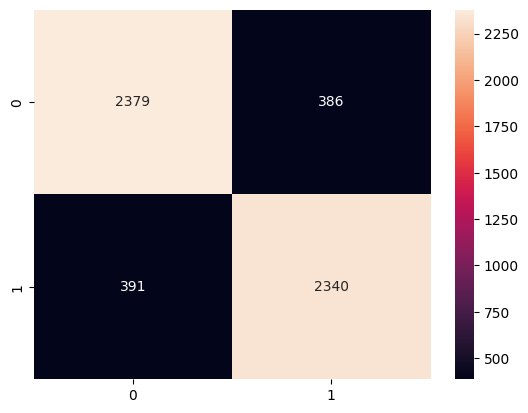

In [217]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = 'd')

In [218]:
def predict_sentiment(review):
  sequence_new = tokenizer.texts_to_sequences([review])
  padded_sequence_new = pad_sequences(sequence_new, maxlen=90)
  prediction = model.predict(padded_sequence_new)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [219]:
new_review = "This movie was bad. I disliked it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The sentiment of the review is: negative


In [220]:
new_review = "bad acting"
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The sentiment of the review is: negative
